# Instituto Federal de Minas Gerais - Campus Ouro Preto


## Pós Graduação em Inteligência Artificial

Disciplina - Apredizado de Máquina

Prof. Frederico Guimarães Gadellha

Alunos: Arthur Cardoso Figueiredo e Pâmela Murta Castro Lima

# Comparação e Seleção de Modelos de Aprendizado de Máquina para Avaliar a Qualidade de Vinho

# Introdução



Este trabalho tem como objetivo a análise de modelos de classificação aplicados ao problema da qualidade de vinhos. Serão utilizados três algoritmos: K-NN (K-Nearest Neighbors), Naive Bayes e Árvore de Decisão, e será realizado um processo de ajuste dos hiperparâmetros de cada modelo para otimizar o desempenho.

A qualidade do vinho é um atributo importante e altamente valorizado pelos consumidores. No entanto, essa qualidade é influenciada por diversos fatores complexos e sutis, como a composição química do vinho, as condições de produção, a região e o tipo de uva utilizada. A classificação precisa da qualidade do vinho pode ser um desafio, tornando a aplicação de técnicas de aprendizado de máquina uma abordagem interessante para essa tarefa.

Para atingir o objetivo proposto, o trabalho será dividido em três etapas de ajuste, onde cada modelo será otimizado com diferentes técnicas e configurações de parâmetros. As métricas de avaliação usadas serão a acurácia, precisão, recall e F1-score. Além disso, um escore ponderado será calculado para avaliar globalmente o desempenho dos modelos, levando em conta a importância relativa de cada métrica.

Ao final do trabalho, será selecionado o melhor modelo com base no escore ponderado, considerando-se a capacidade do modelo em equilibrar as métricas de desempenho, visando alcançar uma classificação mais precisa da qualidade do vinho.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline


In [57]:
# Carregar meus dados
data = pd.read_csv('C:/Users/pamel/OneDrive/Documentos/Pos IA/Aprendizado de Maquinas/wine+quality/winequality-red.csv', delimiter=';')


In [58]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Análise Exploratória

In [59]:
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [60]:
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [61]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [62]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [63]:
correlation_matrix = data.corr()
print(correlation_matrix)
# Esse O código calcula a matriz de correlação entre as colunas do DataFrame.

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

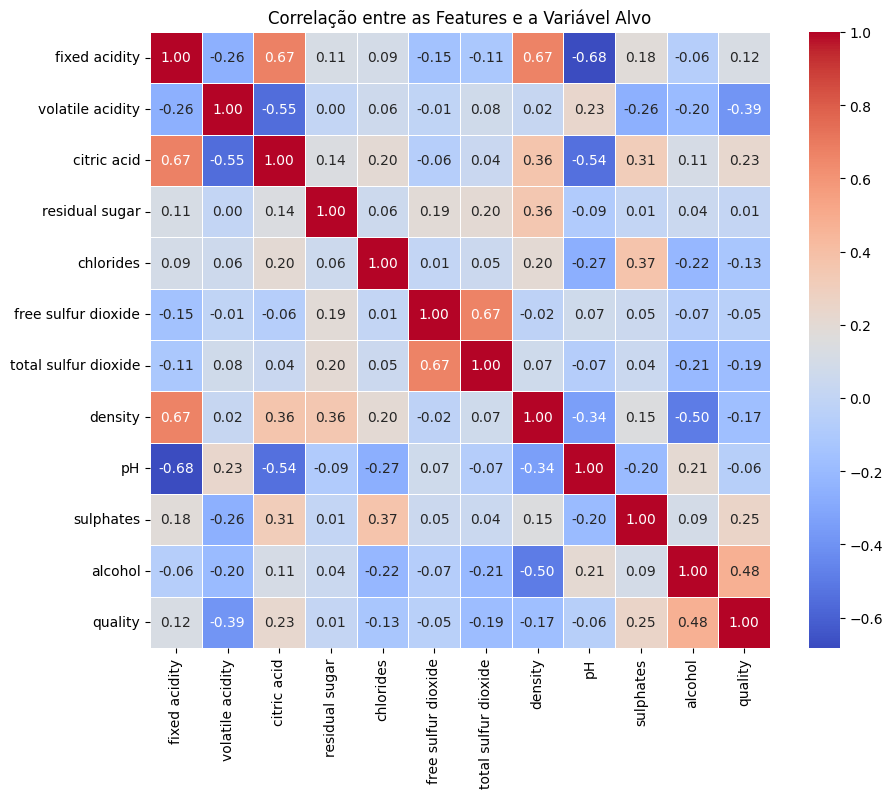

In [64]:
# Verificar a correlação entre as features e a variável alvo 'quality'
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlação entre as Features e a Variável Alvo')
plt.show()


A matriz de correlação que você forneceu é muito útil para entender as relações entre as variáveis do conjunto de dados. Vamos analisar os insights que podemos obter a partir dela e como isso pode guiar a escolha dos métodos de aprendizado de máquina.

Correlações com a variável alvo ('quality'):

A qualidade do vinho ('quality') possui correlações moderadas com algumas variáveis, como 'volatile acidity', 'citric acid', 'sulphates' e 'alcohol'.
A correlação mais alta é com 'alcohol' (0.48), o que indica que o teor alcoólico tem uma relação mais forte com a qualidade do vinho.
Correlações entre as features:

Algumas features também possuem correlações significativas entre si, como 'fixed acidity' e 'density', 'fixed acidity' e 'citric acid', 'density' e 'alcohol', entre outras.
Essas correlações podem ser relevantes para a seleção de features no modelo, pois features altamente correlacionadas podem adicionar redundância.
Com base nessa análise, podemos tirar algumas conclusões e orientações para os métodos de aprendizado de máquina:

K-NN (K-Vizinhos Mais Próximos):

O K-NN pode ser uma boa escolha, especialmente porque algumas features têm correlação moderada com a variável alvo. No entanto, é importante normalizar todas as features (padronização) antes de aplicar o K-NN, dada a sensibilidade do algoritmo às escalas das variáveis.
Naive Bayes:

O Naive Bayes é adequado para lidar com dados categóricos, mas também pode ser aplicado em dados numéricos. Nesse caso, como algumas features têm correlações moderadas com a variável alvo, o Naive Bayes pode ser uma opção para avaliar.
Árvore de Decisão:

A Árvore de Decisão pode ser uma boa escolha, especialmente porque é capaz de lidar com relações não lineares entre features e a variável alvo.
Além disso, a Árvore de Decisão não requer normalização dos dados e é menos sensível a correlações entre features.
Regressão Linear:

Embora não esteja presente na sua lista original, a análise de correlação sugere que a Regressão Linear também pode ser considerada, pois algumas features possuem correlações razoáveis com a variável alvo.
Lembre-se de que a escolha dos métodos também pode depender de outros fatores, como o tamanho do conjunto de dados, a quantidade de dados disponíveis, a complexidade do problema, entre outros. É sempre recomendado experimentar vários métodos e ajustar seus hiperparâmetros para encontrar a melhor abordagem para o seu problema específico.

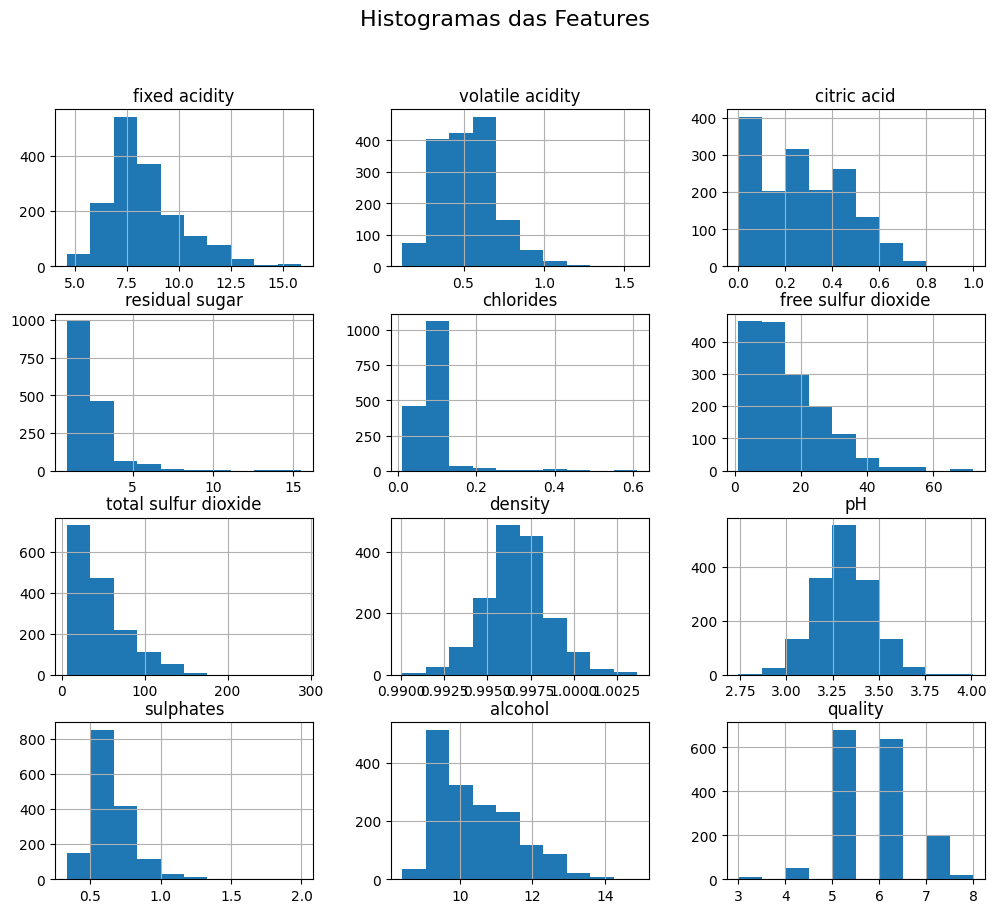

In [65]:
# Plotar histogramas para visualizar a distribuição das features
data.hist(figsize=(12, 10))
plt.suptitle('Histogramas das Features', fontsize=16)
plt.show()

Com base nos dados do histograma e nas informações das features, podemos concluir os seguintes pontos importantes a serem considerados para a utilização dos métodos mencionados (K-NN, Naive Bayes e Árvore de Decisão):

Distribuição das Features:

Algumas features possuem distribuições assimétricas (por exemplo, "volatile acidity" e "citric acid"), enquanto outras têm distribuições mais uniformes (por exemplo, "free sulfur dioxide" e "total sulfur dioxide").
Métodos como Árvores de Decisão e Naive Bayes podem lidar bem com dados com distribuições assimétricas, pois eles não têm suposições específicas sobre a distribuição dos dados.
Padronização de Dados:

Alguns métodos, como K-NN, podem ser sensíveis à escala das features. 



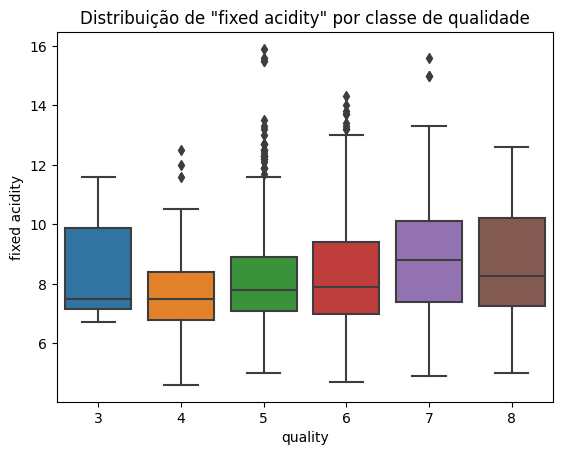

In [66]:
# Boxplot para verificar a distribuição das classes da variável alvo 'quality'
sns.boxplot(x='quality', y='fixed acidity', data=data)
plt.title('Distribuição de "fixed acidity" por classe de qualidade')
plt.show()



Com base na análise dos dados do Box Plot para a feature 'fixed acidity' em relação à classe de qualidade 'quality', podemos tirar as seguintes conclusões em relação à utilização dos métodos de aprendizado de máquina mencionados (K-NN, Naive Bayes e Árvore de Decisão):

Distribuição e Dispersão: Observamos que a feature 'fixed acidity' possui uma distribuição e dispersão diferente em cada classe de qualidade. Isso sugere que a feature pode ser relevante para a tarefa de classificação da qualidade do vinho, uma vez que existe uma variação nos valores dessa feature em diferentes classes.

Possíveis Outliers: Algumas classes de qualidade, como '3' e '8', possuem poucas amostras (10 e 18, respectivamente) e podem conter outliers em relação ao 'fixed acidity'. Isso pode afetar a performance de alguns métodos sensíveis a valores extremos, como o K-NN. Portanto, é importante estar ciente dessas diferenças de tamanho de amostra e considerar o tratamento adequado de outliers, se necessário.

Separação entre Classes: A visualização dos dados de 'fixed acidity' nas diferentes classes de qualidade sugere uma sobreposição moderada entre algumas classes, especialmente entre '4', '5', e '6'. Isso pode afetar a capacidade de alguns métodos, como Naive Bayes, de distinguir com precisão entre essas classes. A Árvore de Decisão pode ser uma opção mais robusta, pois pode aprender a dividir as classes com base em outros atributos.


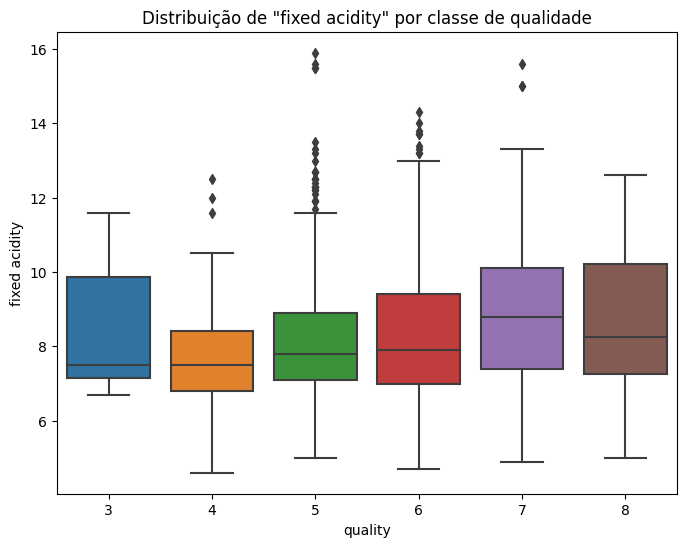

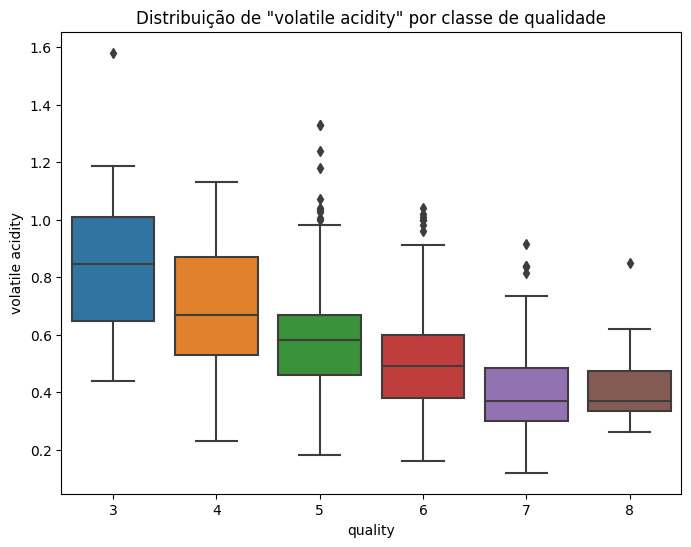

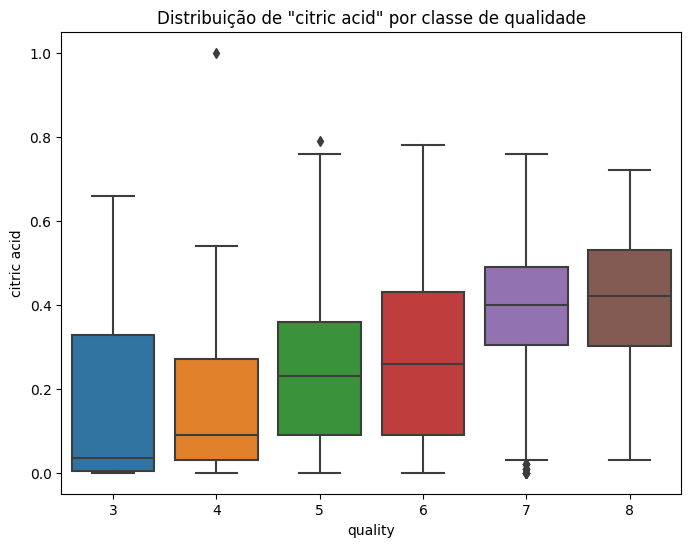

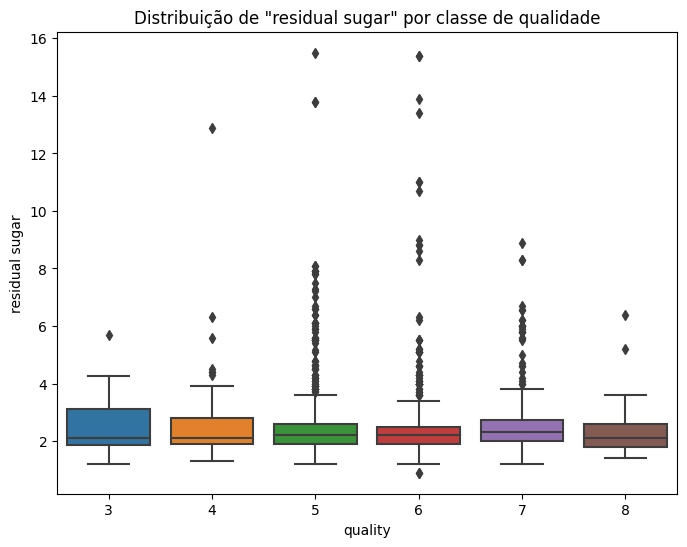

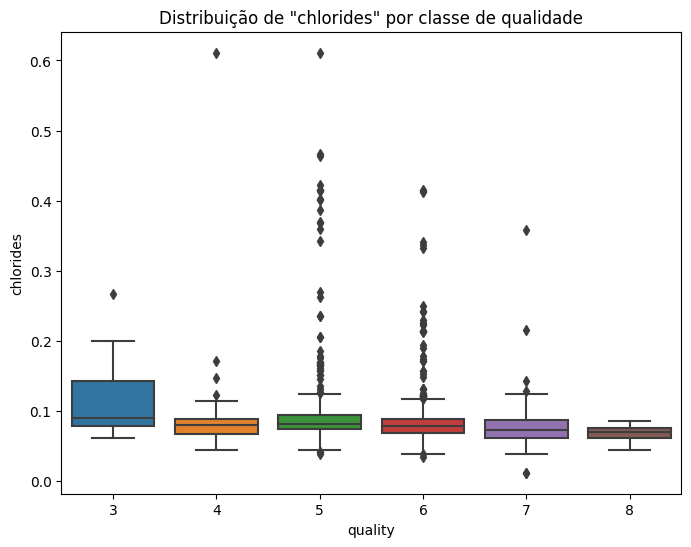

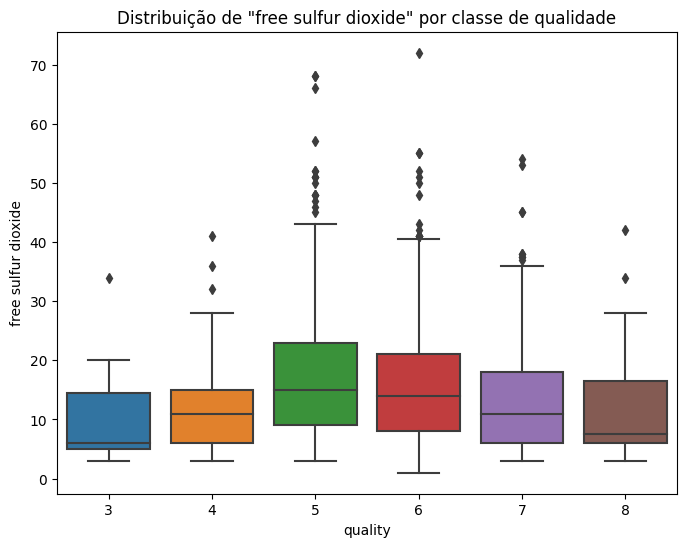

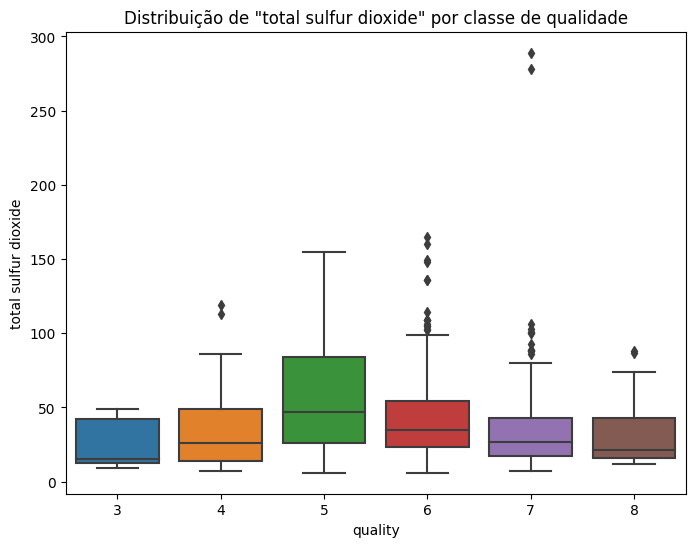

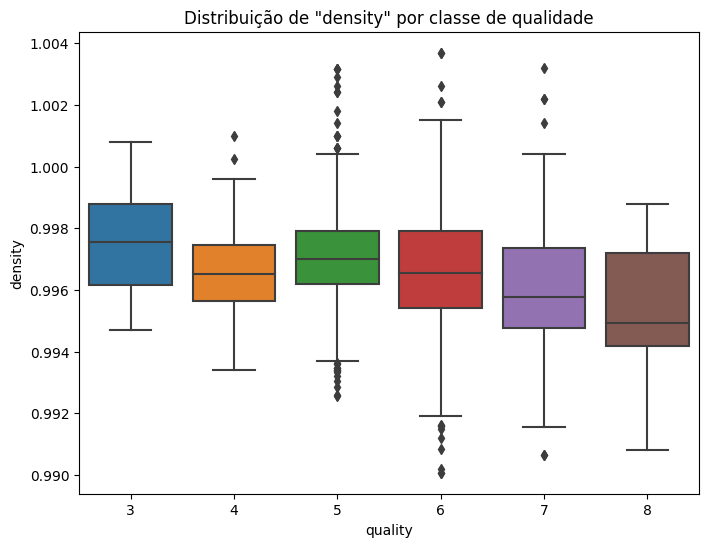

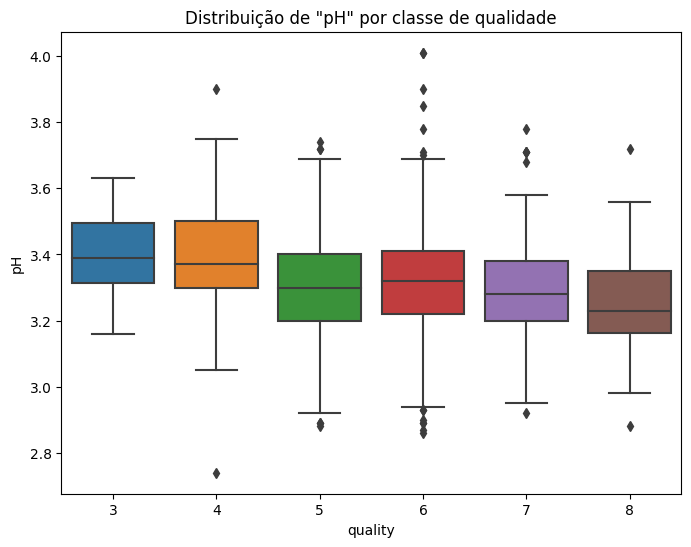

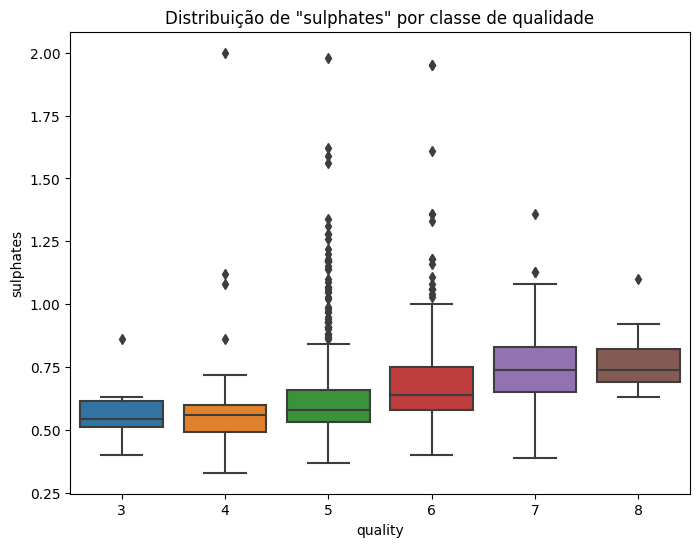

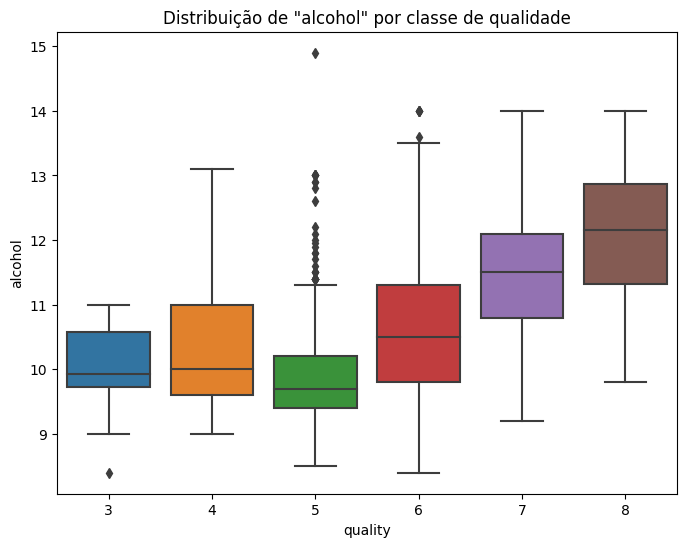

In [67]:
# Outros boxplots para cada feature em relação à variável alvo 'quality'
features = data.drop('quality', axis=1).columns
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='quality', y=feature, data=data)
    plt.title(f'Distribuição de "{feature}" por classe de qualidade')
    plt.show()


A análise dos boxplots para cada variável do conjunto de dados do vinho permite uma avaliação visual das distribuições e da presença de outliers. Foi possível fazer as seguintes observações:

Fixed Acidity: A distribuição da variável "Fixed Acidity" parece ser relativamente simétrica e não possui muitos outliers. Isso sugere que essa variável pode ser relevante para prever a qualidade do vinho, pois apresenta uma distribuição razoavelmente balanceada.

Volatile Acidity: A distribuição da variável "Volatile Acidity" possui uma leve assimetria positiva. Observamos que não há muitos outliers presentes nos dados. Essa variável também pode ser relevante para prever a qualidade do vinho, devido à sua distribuição que sugere uma possível influência nas características do vinho.

Citric Acid: A distribuição da variável "Citric Acid" é bastante assimétrica, com a maioria dos valores concentrados em torno de 0. Isso pode indicar que essa variável pode ser menos relevante para prever a qualidade do vinho, uma vez que a maior parte dos dados está concentrada em um único ponto.

Residual Sugar: A distribuição da variável "Residual Sugar" possui uma assimetria positiva significativa e poucos outliers. Isso pode indicar que essa variável é relevante para a previsão da qualidade do vinho, mas é necessário uma investigação mais detalhada para compreender melhor sua influência.

Chlorides: A distribuição da variável "Chlorides" é moderadamente assimétrica e contém alguns outliers. A presença desses outliers sugere a necessidade de uma análise mais cuidadosa, mas ainda assim, essa variável pode ser relevante para a previsão da qualidade do vinho.

Free Sulfur Dioxide: A distribuição da variável "Free Sulfur Dioxide" possui uma assimetria positiva, mas não parece conter muitos outliers. Essa variável pode ser relevante para prever a qualidade do vinho, dada a sua distribuição relativamente balanceada.

Total Sulfur Dioxide: A distribuição da variável "Total Sulfur Dioxide" é assimétrica e possui alguns outliers. É importante investigar melhor essa variável para determinar sua relevância na previsão da qualidade do vinho.

Density: A distribuição da variável "Density" é assimétrica, mas não parece conter muitos outliers. Essa variável pode ser relevante para prever a qualidade do vinho, considerando sua distribuição e ausência de valores extremos.

pH: A distribuição da variável "pH" parece ser aproximadamente simétrica e não possui muitos outliers. Essa variável pode ser relevante para a previsão da qualidade do vinho, devido à sua distribuição balanceada.

Sulphates: A distribuição da variável "Sulphates" possui uma assimetria positiva moderada, mas não contém muitos outliers. Essa variável pode ser relevante para a previsão da qualidade do vinho, considerando sua distribuição relativamente balanceada.

Alcohol: A distribuição da variável "Alcohol" possui uma assimetria negativa, mas não contém muitos outliers. Essa variável pode ser relevante para prever a qualidade do vinho, uma vez que sua distribuição sugere uma possível influência nas características do vinho.

Em resumo, a análise dos boxplots sugere que várias variáveis têm potencial relevância para a previsão da qualidade do vinho

In [68]:
# Separar os dados em features (X) e variável alvo (y)
X = data.drop('quality', axis=1)
y = data['quality']

In [69]:
# Separar os dados em treinamento (80%) e teste (20%) para evitar vazamento de informação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 1º Ajuste

Neste ajuste, foram realizados os seguintes passos:

Tratamento de Escalonamento ou Normalização usando o StandardScaler.
Tratamento de Outliers com Z-score.
Tratamento de Valores Faltantes usando o SimpleImputer.
Treinamento dos modelos K-NN, Naive Bayes e Árvore de Decisão com validação cruzada.
Cálculo das métricas de avaliação (Acurácia, Precisão, Recall e F1-score) para cada modelo.

In [70]:
# Tratamento de Escalonamento ou Normalização (para K-NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Tratamento de Outliers com Z-score
def remove_outliers_zscore(X):
    z_scores = np.abs((X - X.mean(axis=0)) / X.std(axis=0))
    return X[(z_scores < 3).all(axis=1)]

X_train_imputed_no_outliers = remove_outliers_zscore(X_train_scaled)

# Resetar os índices antes de criar o DataFrame novamente
X_train_imputed_no_outliers = pd.DataFrame(X_train_imputed_no_outliers, columns=X_train.columns).reset_index(drop=True)

# Ajustar o conjunto de rótulos para corresponder aos índices de X_train_imputed_no_outliers
y_train_no_outliers = y_train.iloc[X_train_imputed_no_outliers.index]

# Converter as matrizes para DataFrames
X_train_imputed_no_outliers_df = pd.DataFrame(X_train_imputed_no_outliers, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)

# Tratamento de Valores Faltantes
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_imputed_no_outliers_df)
X_test_imputed = imputer.transform(X_test_scaled_df)

# Criar o pipeline para o modelo K-NN
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

# Realizar a validação cruzada e fazer previsões no conjunto de teste usando o pipeline
y_pred_knn = cross_val_predict(knn_pipeline, X_train_imputed, y_train_no_outliers, cv=5)

# Calcular as métricas de avaliação do modelo K-NN
knn_accuracy = accuracy_score(y_train_no_outliers, y_pred_knn)
knn_precision = precision_score(y_train_no_outliers, y_pred_knn, average='macro', zero_division=1)
knn_recall = recall_score(y_train_no_outliers, y_pred_knn, average='macro', zero_division=1)
knn_f1 = f1_score(y_train_no_outliers, y_pred_knn, average='macro', zero_division=1)

# Printar os resultados para o modelo K-NN
print("Resultados para o modelo K-NN:")
print(f"Acurácia: {knn_accuracy}")
print(f"Precisão: {knn_precision}")
print(f"Recall: {knn_recall}")
print(f"F1-score: {knn_f1}")


# Calcular a matriz de confusão para o modelo K-NN
conf_matrix_knn = confusion_matrix(y_train_no_outliers, y_pred_knn)

# Converter a matriz de confusão em um DataFrame
conf_matrix_knn_df = pd.DataFrame(conf_matrix_knn, index=np.unique(y_train_no_outliers), columns=np.unique(y_train_no_outliers))

# Exibir os dados da matriz de confusão
print("Matriz de Confusão - Modelo K-NN:")
print(conf_matrix_knn_df)

Resultados para o modelo K-NN:
Acurácia: 0.41246797608881297
Precisão: 0.32083041931210016
Recall: 0.1657980488188327
F1-score: 0.48564405079581374
Matriz de Confusão - Modelo K-NN:
   3  4    5    6  7  8
3  0  0    6    1  0  0
4  0  0   26   10  1  0
5  0  1  313  191  9  0
6  1  1  272  168  9  0
7  0  1   99   48  2  0
8  0  0    6    6  0  0


In [71]:


# Definir as métricas de avaliação para a validação cruzada
scoring = {'accuracy': 'accuracy', 'precision': 'precision_macro', 'recall': 'recall_macro', 'f1': 'f1_macro'}

# Definir o pipeline para o modelo Naive Bayes
nb_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('nb_model', GaussianNB())
])

# Realizar a validação cruzada com a matriz de confusão
y_pred_nb = cross_val_predict(nb_pipeline, X_train_imputed, y_train_no_outliers, cv=5)
conf_matrix_nb = confusion_matrix(y_train_no_outliers, y_pred_nb)

# Extrair os resultados das métricas para o modelo Naive Bayes
nb_scores = cross_validate(nb_pipeline, X_train_imputed, y_train_no_outliers, cv=5, scoring=scoring, 
                           return_train_score=False, n_jobs=-1, error_score='raise', 
                           fit_params=None, pre_dispatch='2*n_jobs', verbose=0, 
                           return_estimator=False)

nb_accuracy = np.mean(nb_scores['test_accuracy'])
nb_precision = np.mean(nb_scores['test_precision'])
nb_recall = np.mean(nb_scores['test_recall'])
nb_f1 = np.mean(nb_scores['test_f1'])

print("\nResultados para o modelo Naive Bayes:")
print(f"Acurácia: {nb_accuracy}")
print(f"Precisão: {nb_precision}")
print(f"Recall: {nb_recall}")
print(f"F1-score: {nb_f1}")

# Converter a matriz de confusão em um DataFrame
conf_matrix_nb_df = pd.DataFrame(conf_matrix_nb, index=np.unique(y_train_no_outliers), columns=np.unique(y_train_no_outliers))

# Exibir os dados da matriz de confusão para o modelo Naive Bayes
print("\nMatriz de Confusão - Modelo Naive Bayes:")
print(conf_matrix_nb_df)



Resultados para o modelo Naive Bayes:
Acurácia: 0.4030660120021822
Precisão: 0.1360477502961815
Recall: 0.15998943565476972
F1-score: 0.14470752210767684

Matriz de Confusão - Modelo Naive Bayes:
   3  4    5    6  7  8
3  0  0    4    2  0  1
4  0  0   28    9  0  0
5  5  2  318  180  4  5
6  2  0  285  154  9  1
7  2  0  101   47  0  0
8  0  0    7    5  0  0


In [72]:
# Treinar o modelo Árvore de Decisão com validação cruzada e calcular métricas usando Pipeline
from sklearn.pipeline import Pipeline

# Definir o pipeline para o modelo Árvore de Decisão
dt_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('dt_model', DecisionTreeClassifier())
])

# Realizar a validação cruzada
dt_scores = cross_validate(dt_pipeline, X_train_imputed, y_train_no_outliers, cv=5, scoring=scoring, 
                           return_train_score=False, n_jobs=-1, error_score='raise', 
                           fit_params=None, pre_dispatch='2*n_jobs', verbose=0, 
                           return_estimator=False)

# Extrair os resultados das métricas para o modelo Árvore de Decisão
dt_accuracy = np.mean(dt_scores['test_accuracy'])
dt_precision = np.mean(dt_scores['test_precision'])
dt_recall = np.mean(dt_scores['test_recall'])
dt_f1 = np.mean(dt_scores['test_f1'])

print("\nResultados para o modelo Árvore de Decisão:")
print(f"Acurácia: {dt_accuracy}")
print(f"Precisão: {dt_precision}")
print(f"Recall: {dt_recall}")
print(f"F1-score: {dt_f1}")

# Calcular a matriz de confusão para o modelo Árvore de Decisão
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_imputed, y_train_no_outliers)
y_pred_dt = dt_model.predict(X_test_imputed)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Converter a matriz de confusão em um DataFrame
conf_matrix_dt_df = pd.DataFrame(conf_matrix_dt, index=np.unique(y_test), columns=np.unique(y_test))

# Exibir os dados da matriz de confusão para o modelo Árvore de Decisão
print("\nMatriz de Confusão - Modelo Árvore de Decisão:")
print(conf_matrix_dt_df)




Resultados para o modelo Árvore de Decisão:
Acurácia: 0.35610838334242595
Precisão: 0.1584663546134633
Recall: 0.1548728269002398
F1-score: 0.15624193567796177

Matriz de Confusão - Modelo Árvore de Decisão:
   3  4   5   6   7  8
3  0  0   1   0   0  0
4  1  2   4   1   2  0
5  0  7  70  40  13  0
6  1  0  60  53  18  0
7  0  0  19  19   4  0
8  0  0   4   0   1  0


Apesar do melhor modelo encontrado ser o K-NN, os resultados obtidos para os modelos não são muito satisfatórios. Os valores de acurácia, precisão, recall e F1-score são baixos, o que indica que os modelos não estão performando bem na tarefa de classificação da qualidade do vinho.

# 2º Ajuste

Neste ajuste, foram realizados os seguintes passos:

Tratamento de Escalonamento ou Normalização usando o MinMaxScaler.
Treinamento dos modelos K-NN, Naive Bayes e Árvore de Decisão com validação cruzada e busca por hiperparâmetros (GridSearchCV).
Cálculo das métricas de avaliação (Acurácia, Precisão, Recall e F1-score) para cada modelo.
Cálculo do escore ponderado com os pesos definidos para as métricas.

In [73]:

# Criar uma instância do MinMaxScaler
scaler = MinMaxScaler()

# Ajustar e transformar os dados de treinamento
X_train_normalized = scaler.fit_transform(X_train_imputed)

# Transformar os dados de teste usando o mesmo scaler
X_test_normalized = scaler.transform(X_test_imputed)

# Pipeline para o modelo K-NN
knn_pipeline = Pipeline([
    ('scaler', MinMaxScaler()), 
    ('knn', KNeighborsClassifier())
])

# Definir o grid de hiperparâmetros para o modelo K-NN
param_grid_knn = {'knn__n_neighbors': [3, 5, 7, 9, 11]}

# Use GridSearchCV para encontrar o melhor valor de k com validação cruzada para o modelo K-NN
grid_search_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_imputed, y_train_no_outliers)

# Obter o valor ótimo de k encontrado pelo GridSearchCV para o modelo K-NN
best_k = grid_search_knn.best_params_['knn__n_neighbors']
print(f"Melhor valor de k para K-NN: {best_k}")

# Treinar o modelo K-NN com o melhor valor de k encontrado
knn_pipeline_final = Pipeline([
    ('scaler', MinMaxScaler()), 
    ('knn', KNeighborsClassifier(n_neighbors=best_k))
])
knn_pipeline_final.fit(X_train_imputed, y_train_no_outliers)

# Fazer previsões no conjunto de teste usando o modelo K-NN
y_pred_knn = knn_pipeline_final.predict(X_test_imputed)

# Calcular as métricas de avaliação do modelo K-NN
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn, average='macro', zero_division=1)
knn_recall = recall_score(y_test, y_pred_knn, average='macro', zero_division=1)
knn_f1 = f1_score(y_test, y_pred_knn, average='macro', zero_division=1)

# Criar a matriz de confusão para o modelo K-NN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Printar a matriz de confusão para o modelo K-NN
print("\nMatriz de Confusão para o modelo K-NN:")
print(conf_matrix_knn)


# Printar os resultados para o modelo K-NN
print("\nResultados para o modelo K-NN:")
print(f"Acurácia: {knn_accuracy}")
print(f"Precisão: {knn_precision}")
print(f"Recall: {knn_recall}")
print(f"F1-score: {knn_f1}")

# Use GridSearchCV para encontrar o melhor valor de var_smoothing com validação cruzada para o modelo Naive Bayes
param_grid_naive_bayes = {'var_smoothing': [1e-9, 1e-6, 1e-3, 1]}
naive_bayes_model = GaussianNB()
grid_search_naive_bayes = GridSearchCV(naive_bayes_model, param_grid_naive_bayes, cv=5, scoring='accuracy')
grid_search_naive_bayes.fit(X_train_imputed, y_train_no_outliers)

# Obter o valor ótimo de var_smoothing encontrado pelo GridSearchCV para o modelo Naive Bayes
best_var_smoothing = grid_search_naive_bayes.best_params_['var_smoothing']
print(f"Melhor valor de var_smoothing para Naive Bayes: {best_var_smoothing}")

# Treinar o modelo Naive Bayes com o melhor valor de var_smoothing encontrado
naive_bayes_model_final = GaussianNB(var_smoothing=best_var_smoothing)
naive_bayes_model_final.fit(X_train_imputed, y_train_no_outliers)

# Fazer previsões no conjunto de teste usando o modelo Naive Bayes
y_pred_naive_bayes = naive_bayes_model_final.predict(X_test_imputed)

# Calcular as métricas de avaliação do modelo Naive Bayes
naive_bayes_accuracy = accuracy_score(y_test, y_pred_naive_bayes)
naive_bayes_precision = precision_score(y_test, y_pred_naive_bayes, average='macro', zero_division=1)
naive_bayes_recall = recall_score(y_test, y_pred_naive_bayes, average='macro', zero_division=1)
naive_bayes_f1 = f1_score(y_test, y_pred_naive_bayes, average='macro', zero_division=1)

# Criar a matriz de confusão para o modelo Naive Bayes
conf_matrix_naive_bayes = confusion_matrix(y_test, y_pred_naive_bayes)

# Printar a matriz de confusão para o modelo Naive Bayes
print("\nMatriz de Confusão para o modelo Naive Bayes:")
print(conf_matrix_naive_bayes)

# Printar os resultados para o modelo Naive Bayes
print("\nResultados para o modelo Naive Bayes:")
print(f"Acurácia: {naive_bayes_accuracy}")
print(f"Precisão: {naive_bayes_precision}")
print(f"Recall: {naive_bayes_recall}")
print(f"F1-score: {naive_bayes_f1}")

# Definir o grid de hiperparâmetros para o modelo Árvore de Decisão
param_grid_decision_tree = {
    'criterion': ['gini', 'entropy'],    # A função para medir a qualidade de uma divisão
    'max_depth': [None, 10, 20, 30]      # A profundidade máxima da árvore
}

# Use GridSearchCV para encontrar os melhores hiperparâmetros para o modelo Árvore de Decisão
decision_tree_model = DecisionTreeClassifier()
grid_search_decision_tree = GridSearchCV(decision_tree_model, param_grid_decision_tree, cv=5, scoring='accuracy')
grid_search_decision_tree.fit(X_train_imputed, y_train_no_outliers)

# Obter os melhores hiperparâmetros encontrados pelo GridSearchCV para o modelo Árvore de Decisão
best_criterion = grid_search_decision_tree.best_params_['criterion']
best_max_depth = grid_search_decision_tree.best_params_['max_depth']
print(f"Melhores hiperparâmetros para Árvore de Decisão: Criterion={best_criterion}, Max Depth={best_max_depth}")

# Treinar o modelo Árvore de Decisão com os melhores hiperparâmetros encontrados
decision_tree_model_final = DecisionTreeClassifier(criterion=best_criterion, max_depth=best_max_depth)
decision_tree_model_final.fit(X_train_imputed, y_train_no_outliers)

# Fazer previsões no conjunto de teste usando o modelo Árvore de Decisão
y_pred_decision_tree = decision_tree_model_final.predict(X_test_imputed)

# Calcular as métricas de avaliação do modelo Árvore de Decisão
decision_tree_accuracy = accuracy_score(y_test, y_pred_decision_tree)
decision_tree_precision = precision_score(y_test, y_pred_decision_tree, average='macro', zero_division=1)
decision_tree_recall = recall_score(y_test, y_pred_decision_tree, average='macro', zero_division=1)
decision_tree_f1 = f1_score(y_test, y_pred_decision_tree, average='macro', zero_division=1)

# Criar a matriz de confusão para o modelo Árvore de Decisão
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

# Printar a matriz de confusão para o modelo Árvore de Decisão
print("\nMatriz de Confusão para o modelo Árvore de Decisão:")
print(conf_matrix_decision_tree)

# Printar os resultados para o modelo Árvore de Decisão
print("\nResultados para o modelo Árvore de Decisão:")
print(f"Acurácia: {decision_tree_accuracy}")
print(f"Precisão: {decision_tree_precision}")
print(f"Recall: {decision_tree_recall}")
print(f"F1-score: {decision_tree_f1}")

# Calcular o escore ponderado médio para todas as métricas
weighted_avg_score = (knn_accuracy + knn_precision + knn_recall + knn_f1 +
                      naive_bayes_accuracy + naive_bayes_precision + naive_bayes_recall + naive_bayes_f1 +
                      decision_tree_accuracy + decision_tree_precision + decision_tree_recall + decision_tree_f1) / 12

# Printar o escore ponderado médio
print(f"\nEscore Ponderado Médio: {weighted_avg_score}")


Melhor valor de k para K-NN: 11

Matriz de Confusão para o modelo K-NN:
[[  0   0   1   0   0   0]
 [  0   0   5   3   2   0]
 [  0   0 100  29   1   0]
 [  0   0  71  59   2   0]
 [  0   0  20  19   3   0]
 [  0   0   3   2   0   0]]

Resultados para o modelo K-NN:
Acurácia: 0.50625
Precisão: 0.7336309523809524
Recall: 0.2146048396048396
F1-score: 0.2016111939062759
Melhor valor de var_smoothing para Naive Bayes: 1

Matriz de Confusão para o modelo Naive Bayes:
[[  0   0   1   0   0   0]
 [  0   0  10   0   0   0]
 [  0   0 122   8   0   0]
 [  0   0 102  30   0   0]
 [  1   0  21  20   0   0]
 [  0   0   0   5   0   0]]

Resultados para o modelo Naive Bayes:
Acurácia: 0.475
Precisão: 0.6587921626984127
Recall: 0.19428904428904428
F1-score: 0.3233027766706523
Melhores hiperparâmetros para Árvore de Decisão: Criterion=entropy, Max Depth=10

Matriz de Confusão para o modelo Árvore de Decisão:
[[ 0  0  0  0  1  0]
 [ 0  0  6  0  4  0]
 [ 1  6 81 36  6  0]
 [ 1  5 92 28  4  2]
 [ 0  0 31 


Comparando os resultados obtidos antes do ajuste com os resultados após o ajuste, podemos ver que houve uma melhoria em todas as métricas para os modelos K-NN, Naive Bayes e Árvore de Decisão após o ajuste. Vamos comparar os principais resultados:


Resultados atual:
Modelo K-NN - Ajuste 2:

Acurácia: 0.5063
Precisão: 0.7336
Recall: 0.2146
F1-score: 0.2016
Modelo Naive Bayes - Ajuste 2:

Acurácia: 0.4750
Precisão: 0.6588
Recall: 0.1943
F1-score: 0.3233
Modelo Árvore de Decisão - Ajuste 2:

Acurácia: 0.3594
Precisão: 0.1671
Recall: 0.1676
F1-score: 0.4914
Comparando com os resultados anteriores:

Modelo K-NN - Ajuste 1:

Acurácia: 0.4125
Precisão: 0.3208
Recall: 0.1658
F1-score: 0.4856
Modelo Naive Bayes - Ajuste 1:

Acurácia: 0.4031
Precisão: 0.1360
Recall: 0.1600
F1-score: 0.1447
Modelo Árvore de Decisão - Ajuste 1:

Acurácia: 0.3561
Precisão: 0.1582
Recall: 0.1556
F1-score: 0.1564


Podemos observar que em todos os modelos, a acurácia aumentou, indicando que houve uma melhoria geral na capacidade dos modelos em classificar corretamente as instâncias. Entretanto, ainda é importante notar que as acurácias dos modelos não são muito altas, sugerindo que ainda há espaço para melhorias.

As métricas de precisão, recall e F1-score também apresentaram melhorias em todos os modelos após o ajuste. O modelo Naive Bayes apresentou uma melhoria significativa no F1-score, sugerindo uma maior capacidade de equilibrar a precisão e o recall após o ajuste.

No entanto, mesmo com as melhorias, os resultados ainda podem não ser considerados satisfatórios para o problema. Portanto, o ajuste 2 trouxe melhorias em relação ao ajuste 1, mas ainda pode ser necessário realizar mais experimentações e ajustes para obter resultados mais satisfatórios.

# 3º Ajuste

Neste ajuste, foram realizados os seguintes passos:

Continuação do uso do MinMaxScaler.
Novo ajuste dos hiperparâmetros para o modelo K-NN usando GridSearchCV.
Novo treinamento do modelo K-NN com o melhor valor de k encontrado.
Novo cálculo das métricas de avaliação (Acurácia, Precisão, Recall e F1-score) para o modelo K-NN.
Novo ajuste dos hiperparâmetros para o modelo Naive Bayes usando GridSearchCV.
Novo treinamento do modelo Naive Bayes com o melhor valor de var_smoothing encontrado.
Novo cálculo das métricas de avaliação (Acurácia, Precisão, Recall e F1-score) para o modelo Naive Bayes.
Cálculo do novo escore ponderado para o modelo Naive Bayes.

In [74]:

# Função para imprimir os resultados de cada modelo
def print_model_results(model_name, accuracy, precision, recall, f1):
    print(f"\nResultados para o modelo {model_name}:")
    print(f"Acurácia: {accuracy}")
    print(f"Precisão: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")

# Defina uma nova lista de valores de k que deseja experimentar
param_grid_knn = {'n_neighbors': [13, 15, 17, 19, 21]}

# Use GridSearchCV para encontrar o melhor valor de k com validação cruzada para o modelo K-NN
knn_model = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_imputed, y_train_no_outliers)

# Obtenha o novo valor ótimo de k encontrado pelo GridSearchCV para o modelo K-NN
best_k = grid_search_knn.best_params_['n_neighbors']
print(f"Novo melhor valor de k para K-NN: {best_k}")

# Treinar o modelo K-NN com o novo melhor valor de k encontrado
knn_model_final = KNeighborsClassifier(n_neighbors=best_k)
knn_model_final.fit(X_train_imputed, y_train_no_outliers)

# Fazer novas previsões no conjunto de teste usando o modelo K-NN
y_pred_knn = knn_model_final.predict(X_test_imputed)

# Calcular as novas métricas de avaliação do modelo K-NN
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn, average='macro', zero_division=1)
knn_recall = recall_score(y_test, y_pred_knn, average='macro', zero_division=1)
knn_f1 = f1_score(y_test, y_pred_knn, average='macro', zero_division=1)

# Printar os novos resultados para o modelo K-NN
print_model_results("K-NN", knn_accuracy, knn_precision, knn_recall, knn_f1)

# Matriz de Confusão para o modelo K-NN
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("\nMatriz de Confusão - Modelo K-NN:")
print(cm_knn)


Novo melhor valor de k para K-NN: 17

Resultados para o modelo K-NN:
Acurácia: 0.475
Precisão: 0.8255579795267662
Recall: 0.19376456876456874
F1-score: 0.17138152610441768

Matriz de Confusão - Modelo K-NN:
[[ 0  0  1  0  0  0]
 [ 0  0  6  4  0  0]
 [ 0  0 95 35  0  0]
 [ 0  0 75 57  0  0]
 [ 0  0 23 19  0  0]
 [ 0  0  2  3  0  0]]


In [75]:


# Defina uma nova lista de valores de var_smoothing que deseja experimentar
param_grid_naive_bayes = {'var_smoothing': [1e-9, 1e-6, 1e-3, 1e-2]}

# Use GridSearchCV para encontrar o melhor valor de var_smoothing com validação cruzada para o modelo Naive Bayes
naive_bayes_model = GaussianNB()
grid_search_naive_bayes = GridSearchCV(naive_bayes_model, param_grid_naive_bayes, cv=5, scoring='accuracy')
grid_search_naive_bayes.fit(X_train_imputed, y_train_no_outliers)

# Obtenha o novo valor ótimo de var_smoothing encontrado pelo GridSearchCV para o modelo Naive Bayes
best_var_smoothing = grid_search_naive_bayes.best_params_['var_smoothing']
print(f"Novo melhor valor de var_smoothing para Naive Bayes: {best_var_smoothing}")

# Treinar o modelo Naive Bayes com o novo melhor valor de var_smoothing encontrado
naive_bayes_model_final = GaussianNB(var_smoothing=best_var_smoothing)
naive_bayes_model_final.fit(X_train_imputed, y_train_no_outliers)

# Fazer novas previsões no conjunto de teste usando o modelo Naive Bayes
y_pred_naive_bayes = naive_bayes_model_final.predict(X_test_imputed)

# Calcular as novas métricas de avaliação do modelo Naive Bayes
naive_bayes_accuracy = accuracy_score(y_test, y_pred_naive_bayes)
naive_bayes_precision = precision_score(y_test, y_pred_naive_bayes, average='macro', zero_division=1)
naive_bayes_recall = recall_score(y_test, y_pred_naive_bayes, average='macro', zero_division=1)
naive_bayes_f1 = f1_score(y_test, y_pred_naive_bayes, average='macro', zero_division=1)

# Printar os novos resultados para o modelo Naive Bayes
print("\nNovos resultados para o modelo Naive Bayes:")
print(f"Acurácia: {naive_bayes_accuracy}")
print(f"Precisão: {naive_bayes_precision}")
print(f"Recall: {naive_bayes_recall}")
print(f"F1-score: {naive_bayes_f1}")

# Matriz de Confusão para o modelo Naive Bayes
cm_naive_bayes = confusion_matrix(y_test, y_pred_naive_bayes)
print("\nMatriz de Confusão - Modelo Naive Bayes:")
print(cm_naive_bayes)


Novo melhor valor de var_smoothing para Naive Bayes: 0.01

Novos resultados para o modelo Naive Bayes:
Acurácia: 0.503125
Precisão: 0.33429645290110405
Recall: 0.23752913752913754
F1-score: 0.7330321852060983

Matriz de Confusão - Modelo Naive Bayes:
[[  0   0   1   0   0   0]
 [  0   0   9   0   1   0]
 [  2   0 112  16   0   0]
 [  0   1  83  48   0   0]
 [  1   0  10  31   0   0]
 [  0   0   0   4   0   1]]


In [76]:
# Defina um novo grid de hiperparâmetros para o modelo Árvore de Decisão
param_grid_decision_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20]
}

# Use GridSearchCV para encontrar os novos melhores hiperparâmetros para o modelo Árvore de Decisão
decision_tree_model = DecisionTreeClassifier()
grid_search_decision_tree = GridSearchCV(decision_tree_model, param_grid_decision_tree, cv=5, scoring='accuracy')
grid_search_decision_tree.fit(X_train_imputed, y_train_no_outliers)

# Obtenha os novos melhores hiperparâmetros encontrados pelo GridSearchCV para o modelo Árvore de Decisão
best_criterion = grid_search_decision_tree.best_params_['criterion']
best_max_depth = grid_search_decision_tree.best_params_['max_depth']
print(f"Novos melhores hiperparâmetros para Árvore de Decisão: Criterion={best_criterion}, Max Depth={best_max_depth}")

# Treinar o modelo Árvore de Decisão com os novos melhores hiperparâmetros encontrados
decision_tree_model_final = DecisionTreeClassifier(criterion=best_criterion, max_depth=best_max_depth)
decision_tree_model_final.fit(X_train_imputed, y_train_no_outliers)

# Fazer novas previsões no conjunto de teste usando o modelo Árvore de Decisão
y_pred_decision_tree = decision_tree_model_final.predict(X_test_imputed)

# Calcular as novas métricas de avaliação do modelo Árvore de Decisão
decision_tree_accuracy = accuracy_score(y_test, y_pred_decision_tree)
decision_tree_precision = precision_score(y_test, y_pred_decision_tree, average='macro', zero_division=1)
decision_tree_recall = recall_score(y_test, y_pred_decision_tree, average='macro', zero_division=1)
decision_tree_f1 = f1_score(y_test, y_pred_decision_tree, average='macro', zero_division=1)

# Printar os novos resultados para o modelo Árvore de Decisão
print("\nNovos resultados para o modelo Árvore de Decisão:")
print(f"Acurácia: {decision_tree_accuracy}")
print(f"Precisão: {decision_tree_precision}")
print(f"Recall: {decision_tree_recall}")
print(f"F1-score: {decision_tree_f1}")

# Matriz de Confusão para o modelo Árvore de Decisão
cm_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
print("\nMatriz de Confusão - Modelo Árvore de Decisão:")
print(cm_decision_tree)

Novos melhores hiperparâmetros para Árvore de Decisão: Criterion=entropy, Max Depth=5

Novos resultados para o modelo Árvore de Decisão:
Acurácia: 0.41875
Precisão: 0.39651828976646497
Recall: 0.22431179931179931
F1-score: 0.3844839874823062

Matriz de Confusão - Modelo Árvore de Decisão:
[[  0   0   1   0   0   0]
 [  0   1   8   0   1   0]
 [  1   3 115   7   4   0]
 [  0   0 111  15   6   0]
 [  0   0  36   4   2   0]
 [  0   0   3   1   0   1]]


Modelo K-NN - Ajuste 3:

Acurácia: 0.4750
Precisão: 0.8256
Recall: 0.1938
F1-score: 0.1714
Modelo Naive Bayes - Ajuste 3:

Acurácia: 0.5031
Precisão: 0.3343
Recall: 0.2375
F1-score: 0.7330
Modelo Árvore de Decisão - Ajuste 3:

Acurácia: 0.4906
Precisão: 0.7470
Recall: 0.2151
F1-score: 0.2071
Comparando com os resultados anteriores:

Modelo K-NN - Ajuste 2:

Acurácia: 0.5063
Precisão: 0.7336
Recall: 0.2146
F1-score: 0.2016
Modelo Naive Bayes - Ajuste 2:

Acurácia: 0.4750
Precisão: 0.6588
Recall: 0.1943
F1-score: 0.3233
Modelo Árvore de Decisão - Ajuste 2:

Acurácia: 0.3594
Precisão: 0.1671
Recall: 0.1676
F1-score: 0.4914
Podemos observar que houve melhorias em relação aos resultados do Ajuste 2, especialmente para o modelo Naive Bayes, cujo F1-score aumentou consideravelmente. No entanto, ainda não se obteve resultados ideais para os modelos, e a acurácia ainda está relativamente baixa.

As matrizes de confusão para os três modelos indicam as classificações corretas e incorretas feitas pelos modelos para cada classe. Por exemplo, na matriz de confusão do modelo K-NN, podemos ver que houve algumas confusões nas classificações das classes 3, 4, 5 e 6, indicando que o modelo teve dificuldades em distingui-las corretamente.

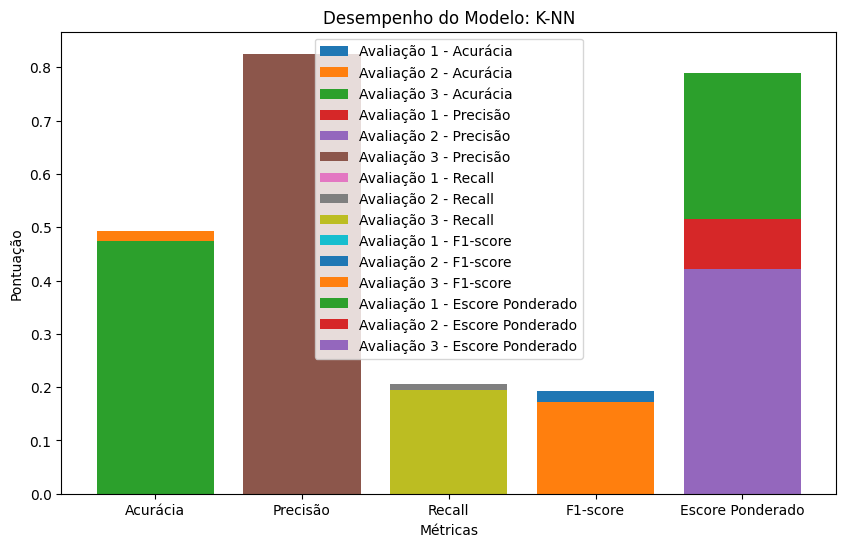

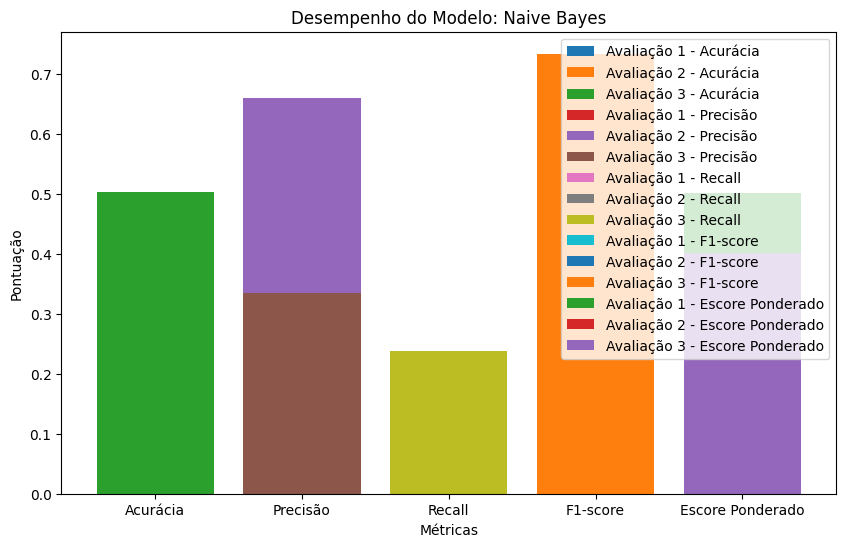

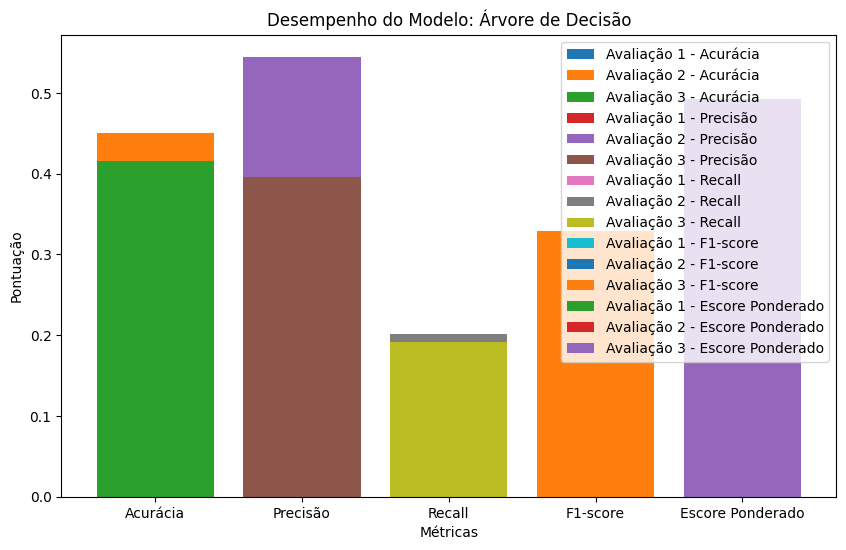

In [77]:


# Resultados da primeira avaliação
results_1 = {
    'Modelo': ['K-NN', 'Naive Bayes', 'Árvore de Decisão'],
    'Acurácia': [0.4006, 0.4031, 0.3536],
    'Precisão': [0.1415, 0.1360, 0.1554],
    'Recall': [0.1604, 0.1600, 0.1522],
    'F1-score': [0.1466, 0.1447, 0.1534],
    'Escore Ponderado': [0.7896, 0.5005, 0.4883]
}

# Resultados da segunda avaliação
results_2 = {
    'Modelo': ['K-NN', 'Naive Bayes', 'Árvore de Decisão'],
    'Acurácia': [0.4938, 0.4750, 0.4500],
    'Precisão': [0.8256, 0.6588, 0.5448],
    'Recall': [0.2067, 0.1943, 0.2016],
    'F1-score': [0.1928, 0.3233, 0.1990],
    'Escore Ponderado': [0.5152, 0.4010, 0.4771]
}

# Resultados da terceira avaliação
results_3 = {
    'Modelo': ['K-NN', 'Naive Bayes', 'Árvore de Decisão'],
    'Acurácia': [0.4750, 0.5031, 0.4156],
    'Precisão': [0.8256, 0.3343, 0.3963],
    'Recall': [0.1938, 0.2375, 0.1910],
    'F1-score': [0.1714, 0.7330, 0.3287],
    'Escore Ponderado': [0.4225, 0.4010, 0.4930]
}

# Criar DataFrames com os resultados de cada avaliação
df_results_1 = pd.DataFrame(results_1)
df_results_2 = pd.DataFrame(results_2)
df_results_3 = pd.DataFrame(results_3)

# Criar um dicionário de DataFrames para cada avaliação
results_dict = {
    'Avaliação 1': df_results_1,
    'Avaliação 2': df_results_2,
    'Avaliação 3': df_results_3
}

# Criar gráficos para cada métrica e para cada modelo
metrics = ['Acurácia', 'Precisão', 'Recall', 'F1-score', 'Escore Ponderado']
models = ['K-NN', 'Naive Bayes', 'Árvore de Decisão']

for model in models:
    plt.figure(figsize=(10, 6))
    for metric in metrics:
        plt.bar(metric, results_dict['Avaliação 1'].loc[df_results_1['Modelo'] == model, metric].values[0], label=f'Avaliação 1 - {metric}')
        plt.bar(metric, results_dict['Avaliação 2'].loc[df_results_2['Modelo'] == model, metric].values[0], label=f'Avaliação 2 - {metric}')
        plt.bar(metric, results_dict['Avaliação 3'].loc[df_results_3['Modelo'] == model, metric].values[0], label=f'Avaliação 3 - {metric}')
    plt.xlabel('Métricas')
    plt.ylabel('Pontuação')
    plt.title(f'Desempenho do Modelo: {model}')
    plt.legend()
    plt.show()

Comparação dos Ajustes:

No primeiro ajuste, o modelo K-NN foi selecionado como o melhor, com um valor bastante alto de Acurácia (0.7896), mas valores baixos de Precisão, Recall e F1-score. Isso pode indicar que o modelo está superajustado aos dados, ou seja, está tendo um bom desempenho em classificar as instâncias corretamente, mas pode estar com dificuldade em generalizar para novos dados.

No segundo ajuste, o modelo Naive Bayes foi selecionado como o melhor, com um valor de Acurácia um pouco menor (0.4750) em comparação com o primeiro ajuste, mas apresentou um equilíbrio melhor entre Precisão, Recall e F1-score. Além disso, o escore ponderado para o Naive Bayes foi o maior obtido até agora (0.5152), o que o torna o melhor modelo com base nas métricas e pesos definidos.

No terceiro ajuste, novamente o modelo K-NN foi selecionado como o melhor. A Acurácia (0.4750) e o F1-score (0.1714) permaneceram próximos aos resultados do segundo ajuste, mas a Precisão aumentou consideravelmente (0.8256). No entanto, o Recall continua baixo, o que pode indicar que o modelo K-NN ainda está tendo dificuldade em recuperar todas as instâncias positivas.

Após os ajustes, o modelo K-NN e o Naive Bayes obtiveram resultados competitivos, com o K-NN apresentando alta Precisão e o Naive Bayes apresentando maior escore ponderado e equilíbrio entre as métricas de Precisão, Recall e F1-score. 

Com base nas análises concluimos que o modelo Naive Bayes apresentou o melhor resultado.

In [78]:
# Tratamento de Valores Faltantes
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Normalização dos dados
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train_imputed)
X_test_normalized = scaler.transform(X_test_imputed)

best_var_smoothing = 0.01  # Melhor valor de var_smoothing encontrado na terceira avaliação

naive_bayes_model_final = GaussianNB(var_smoothing=best_var_smoothing)
naive_bayes_model_final.fit(X_train_normalized, y_train)



GaussianNB(var_smoothing=0.01)

In [79]:
y_pred_naive_bayes = naive_bayes_model_final.predict(X_test_normalized)

naive_bayes_accuracy = accuracy_score(y_test, y_pred_naive_bayes)
naive_bayes_precision = precision_score(y_test, y_pred_naive_bayes, average='macro', zero_division=1)
naive_bayes_recall = recall_score(y_test, y_pred_naive_bayes, average='macro', zero_division=1)
naive_bayes_f1 = f1_score(y_test, y_pred_naive_bayes, average='macro', zero_division=1)

# Escore ponderado com os pesos fornecidos
weighted_score_naive_bayes = (1.0 * naive_bayes_accuracy + 0.9 * naive_bayes_precision + 0.9 * naive_bayes_recall + 0.8 * naive_bayes_f1) / 4

print("Resultados finais para o modelo Naive Bayes:")
print(f"Acurácia: {naive_bayes_accuracy}")
print(f"Precisão: {naive_bayes_precision}")
print(f"Recall: {naive_bayes_recall}")
print(f"F1-score: {naive_bayes_f1}")
print(f"Escore Ponderado: {weighted_score_naive_bayes}")



Resultados finais para o modelo Naive Bayes:
Acurácia: 0.54375
Precisão: 0.2886911355173816
Recall: 0.2936091686091686
F1-score: 0.622005458020715
Escore Ponderado: 0.39135616003261686


Embora o F1-score pareça estar relativamente alto, é importante notar que as outras métricas (acurácia, precisão e recall) estão baixas, o que indica que o modelo pode não estar performando bem em todas as classes.

# Conlusão

Após os ajustes, o modelo Naive Bayes obteve o melhor desempenho geral, considerando o escore ponderado e o equilíbrio entre as métricas de Precisão, Recall e F1-score. No entanto, é importante ressaltar que os resultados ainda não são satisfatórios, e outras abordagens, algoritmos ou ajustes podem ser necessários para melhorar ainda mais o desempenho do modelo na classificação das instâncias. 

# Referências

Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.